# Exercício Técnicas de Treinamento

In [2]:
from torch.utils.data import TensorDataset, DataLoader
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
import torch

plt.rcParams['figure.figsize'] = (8, 8)

In [3]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(2, 16)
    self.fc2 = nn.Linear(16, 2)
    self.fc3 = nn.Linear(2, 1)


  def getFC2Output(self, x):
    x = self.fc1(x)
    x = torch.sigmoid(x)
    x = self.fc2(x)
    x = torch.sigmoid(x)

    return x


  def forward(self, x):
    x = self.getFC2Output(x)
    x = self.fc3(x)

    return x

## Visualização Saída da Rede ao Longo do Treino

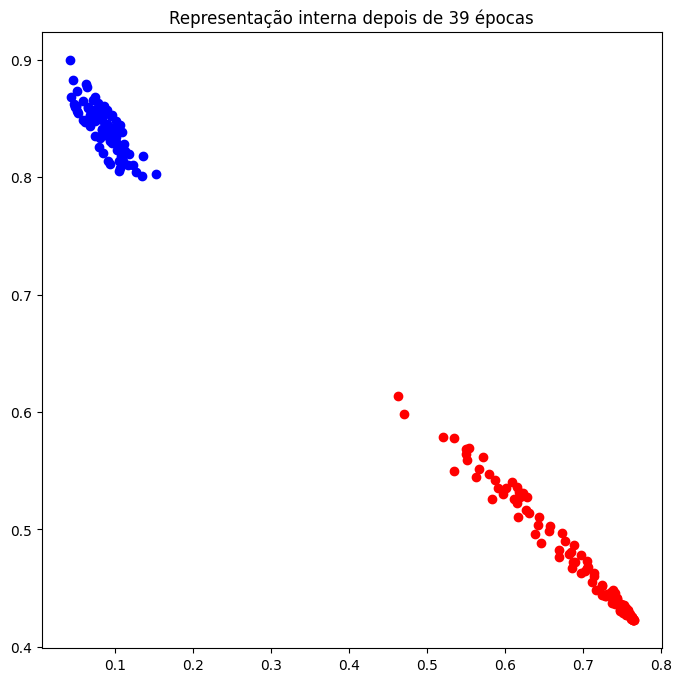

In [4]:
r = np.random.uniform([[0], [2]], [[1], [3]], size=(2, 100))
angle = np.linspace(0, 2 * np.pi , 100 )

data_zero = np.array([r[0] * np.cos(angle), r[0] * np.sin(angle)]).T
data_ones = np.array([r[1] * np.cos(angle), r[1] * np.sin(angle)]).T
data = np.concatenate([data_zero, data_ones])

# Criar os rótulos de classe 100 primeiros são 0, últimos 100 são 1
labels = np.concatenate([np.zeros(100), np.ones(100)])
for i, sample in enumerate(data):
  if labels[i] == 0:
    plt.scatter(sample[0], sample[1], c="red")
  else:
    plt.scatter(sample[0], sample[1], c="blue")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dados originais")
plt.show()

data_tensor = torch.tensor(data, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)

dataset = TensorDataset(data_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
model = NeuralNetwork()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

num_epochs = 40
for epoch in range(num_epochs):
  for batch_data, batch_labels in dataloader:
    optimizer.zero_grad()

    outputs = model(batch_data)
    loss = criterion(outputs.squeeze(), batch_labels)

    loss.backward()
    optimizer.step()

  if (epoch + 1) % 3 == 0:
    clear_output(wait=True)
    plt.clf()
    plt.title(f"Representação interna depois de {epoch+1} épocas")

    for i, sample in enumerate(data):
      FC2output = model.getFC2Output(torch.tensor(sample, dtype=torch.float32)).detach().numpy()
      
      if labels[i] == 0:
        plt.scatter(FC2output[0], FC2output[1], c="red")
      else:
        plt.scatter(FC2output[0], FC2output[1], c="blue")

    plt.show()